In [1184]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import random
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, explained_variance_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression

linreg = LinearRegression()
sb.set() # set the default Seaborn style for graphics

In [1185]:
#get values of cpi
cpi = pd.read_csv('Datasets/Groceries_clean.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#set data series as index and convert to date time
cpi = cpi.rename(columns = {'Data Series':'Date'})
cpi.set_index('Date',inplace=True)
cpi = cpi.rename(columns=lambda x: x.strip())
#cpi.columns = pd.to_datetime(cpi.columns, format='%Y %b').dt.strftime('%Y-%m')
cpi.columns = pd.DatetimeIndex(cpi.columns).to_period('M')


cpi = cpi.T
cpi = cpi.rename(columns=lambda x: x.strip())
cpi = cpi.reindex()
cpi = cpi.replace('na',np.nan)
cpi = cpi.apply(pd.to_numeric)
cpi.head()
#print(cpi.index.name)

Date,All Items,Food,Food Excl Food Serving Services,Bread & Cereals,Meat,Fish & Seafood,"Milk, Cheese & Eggs",Oils & Fats,Fruits,Vegetables,"Sugar, Preserves & Confectionery",Non-Alcoholic Beverages,Other Food,Food Serving Services,Restaurant Food,Fast Food,Hawker Food,Catered Food,Clothing & Footwear,Clothing,Other Articles & Related Services,Footwear,Housing & Utilities,Accommodation,Utilities & Other Fuels,Household Durables & Services,Household Durables,Household Services & Supplies,Health Care,Medicines & Health Products,Outpatient Services,Hospital Services,Health Insurance,Transport,Private Transport,Public Transport,Other Transport Services,Communication,Postage & Courier Services,Telecommunication Equipment,Telecommunication Services,Recreation & Culture,Recreational & Cultural Goods,Recreational & Cultural Services,"Newspapers, Books & Stationery",Holiday Expenses,Education,Tuition & Other Fees,Textbooks & Guides,Miscellaneous Goods & Services,Personal Care,Alcoholic Drinks & Tobacco,Personal Effects,Social Services,Other Miscellaneous Services,All Items Less Imputed Rentals On Owner-Occupied Accommodation,All Items Less Accommodation
2023-01,111.567,113.491,114.165,111.304,123.126,108.068,113.866,111.548,110.453,120.306,111.269,112.775,111.027,113.049,113.477,112.832,113.121,111.847,95.953,95.842,106.098,95.840,109.444,109.348,111.139,105.545,106.759,104.731,104.348,100.322,103.248,106.343,109.131,129.642,134.513,117.171,110.907,100.088,96.681,98.073,100.182,106.234,102.075,107.411,102.982,107.686,104.908,104.829,102.130,100.288,102.815,102.170,97.448,93.758,95.481,111.936,112.211
2022-12,111.000,112.379,113.787,110.517,123.375,106.945,113.059,111.691,111.091,118.743,112.507,114.243,109.710,111.536,111.103,110.385,112.389,109.034,94.080,94.369,103.546,92.534,108.629,108.205,111.194,104.471,105.279,103.929,103.220,101.254,100.897,105.668,108.329,130.402,135.911,115.447,113.210,99.034,95.579,95.969,99.302,107.062,100.946,106.027,102.265,109.098,103.784,103.895,101.792,99.531,101.528,100.680,97.728,95.045,95.181,111.422,111.790
2022-11,110.773,111.853,113.031,109.772,123.009,106.489,112.246,113.379,109.840,117.076,113.762,113.481,109.450,111.251,110.894,110.385,111.862,109.034,93.818,93.864,102.714,93.943,108.368,107.935,111.007,104.769,105.949,103.977,102.875,101.159,100.756,105.161,108.329,131.168,137.755,114.383,114.664,99.094,96.399,99.243,99.140,105.775,101.532,106.023,102.297,106.914,103.357,103.503,101.792,99.713,101.334,100.598,97.916,95.045,95.143,111.206,111.575
2022-10,110.223,111.301,112.562,108.941,122.139,107.107,110.624,115.080,110.828,116.334,113.063,112.607,107.420,110.709,110.055,110.385,111.287,109.034,94.508,94.086,102.626,94.376,108.348,108.186,110.771,104.649,105.940,103.782,102.857,100.858,101.588,104.873,107.134,128.421,133.947,114.544,115.407,99.382,99.680,99.956,99.267,105.481,101.955,106.236,102.263,106.184,103.219,103.343,101.792,99.034,100.793,100.710,97.359,95.045,93.936,110.500,110.791
2022-09,110.154,110.794,112.105,107.746,120.770,107.281,110.656,114.309,111.132,117.139,113.120,111.977,107.181,110.260,109.460,108.605,110.857,109.113,95.346,95.028,101.805,94.922,107.820,107.240,111.580,104.544,106.015,103.557,102.781,101.183,101.369,105.090,106.982,129.304,135.717,114.083,114.528,99.235,99.680,99.755,99.239,105.527,101.094,106.376,101.642,106.743,103.174,103.240,100.953,99.055,101.231,100.454,96.867,94.602,93.936,110.618,110.976


In [1186]:
grocery = cpi[['Food','Food Excl Food Serving Services','Bread & Cereals','Meat','Fish & Seafood','Milk, Cheese & Eggs','Oils & Fats','Fruits','Vegetables','Sugar, Preserves & Confectionery','Non-Alcoholic Beverages','Other Food']].replace('na', np.nan)
grocery = grocery.apply(pd.to_numeric)

In [1187]:
def multivariateLinearRegression(df, yvars):
    # Extract Predictors
    X = pd.DataFrame(df[['Food', 'Food Excl Food Serving Services']])

    for yvar in yvars:
        # Extract Response
        y = pd.DataFrame(df[yvar])

        # Drop missing values from X and y
        data = pd.concat([X, y], axis=1).dropna()

        # Split the Dataset into random Train and Test (80:20)
        X_train, X_test, y_train, y_test = train_test_split(data[X.columns], data[y.columns], test_size=0.2, random_state=42)

        linreg = LinearRegression()         # create the linear regression object
        linreg.fit(X_train, y_train)        # train the linear regression model

        # Print the coefficients of the Regression Line
        print(f"\n{'-'*20}\nPredicting {yvar} using 'Food' and 'Food Excl Food Serving Services'")
        print('Intercept \t: b = ', linreg.intercept_)
        print('Coefficients \t: a = ', linreg.coef_)

        # Formula for the Regression line
        regline_x = X_train
        regline_y = linreg.intercept_ + linreg.coef_[0][0] * X_train.iloc[:,0] + linreg.coef_[0][1] * X_train.iloc[:,1]

        # Predict Response corresponding to Predictors
        y_train_pred = linreg.predict(X_train)
        y_test_pred = linreg.predict(X_test)

        # Plot the Predictions vs the True values
        f, axes = plt.subplots(1, 2, figsize=(10, 6))
        axes[0].scatter(X_train.iloc[:,0], y_train, color="blue")
        axes[0].scatter(X_train.iloc[:,0], y_train_pred, color="red")
        axes[0].set_title(f"Model Prediction on Train Set ({yvar})")
        axes[1].scatter(X_test.iloc[:,0], y_test, color="green")
        axes[1].scatter(X_test.iloc[:,0], y_test_pred, color="red")
        axes[1].set_title(f"Model Prediction on Test Set ({yvar})")
        plt.show()

        # Check the Goodness of Fit (on Train Data)
        print(f"Goodness of Fit of Model \tTrain Dataset ({yvar})")
        print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
        print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
        print()

        # Check the Goodness of Fit (on Test Data)
        print(f"Prediction Accuracy of Model \tTest Dataset ({yvar})")
        print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
        print()


--------------------
Predicting Bread & Cereals using 'Food' and 'Food Excl Food Serving Services'
Intercept 	: b =  [25.6830923]
Coefficients 	: a =  [[-1.91923228  2.64494981]]


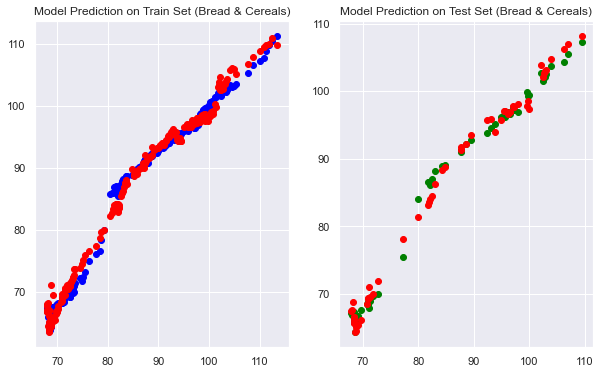

Goodness of Fit of Model 	Train Dataset (Bread & Cereals)
Explained Variance (R^2) 	: 0.9901621975702597
Mean Squared Error (MSE) 	: 1.9257020863484142

Prediction Accuracy of Model 	Test Dataset (Bread & Cereals)
Mean Squared Error (MSE) 	: 1.8700867992856018


--------------------
Predicting Meat using 'Food' and 'Food Excl Food Serving Services'
Intercept 	: b =  [17.01810459]
Coefficients 	: a =  [[-1.82667656  2.67710773]]


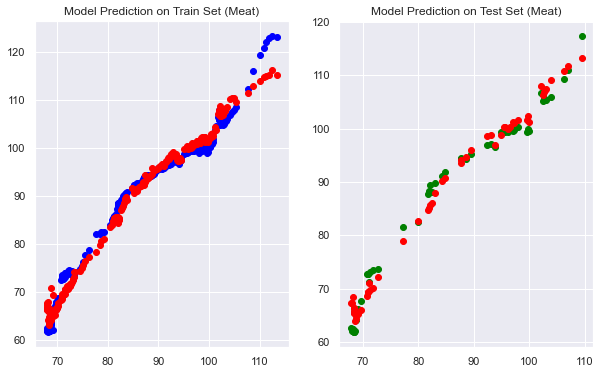

Goodness of Fit of Model 	Train Dataset (Meat)
Explained Variance (R^2) 	: 0.9748639611059489
Mean Squared Error (MSE) 	: 6.245410430816056

Prediction Accuracy of Model 	Test Dataset (Meat)
Mean Squared Error (MSE) 	: 6.401979382838314


--------------------
Predicting Fish & Seafood using 'Food' and 'Food Excl Food Serving Services'
Intercept 	: b =  [-22.70649236]
Coefficients 	: a =  [[ 2.19139675 -0.97746304]]


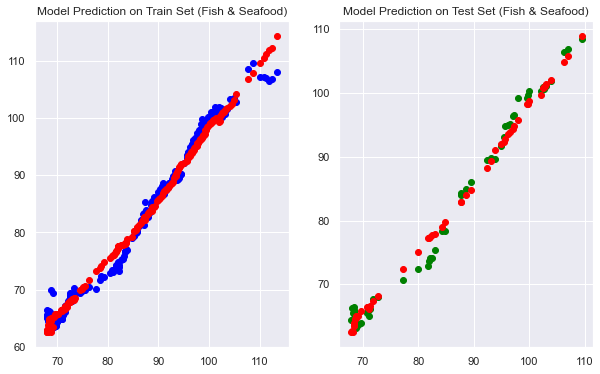

Goodness of Fit of Model 	Train Dataset (Fish & Seafood)
Explained Variance (R^2) 	: 0.9822238653157782
Mean Squared Error (MSE) 	: 3.5502555732188936

Prediction Accuracy of Model 	Test Dataset (Fish & Seafood)
Mean Squared Error (MSE) 	: 3.29165436349768


--------------------
Predicting Milk, Cheese & Eggs using 'Food' and 'Food Excl Food Serving Services'
Intercept 	: b =  [-18.25375009]
Coefficients 	: a =  [[-0.07187815  1.25216647]]


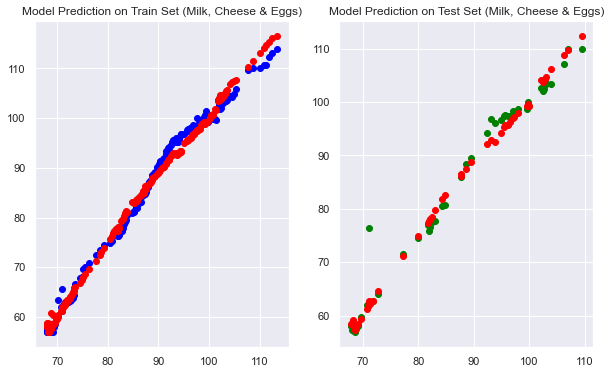

Goodness of Fit of Model 	Train Dataset (Milk, Cheese & Eggs)
Explained Variance (R^2) 	: 0.9926829135832624
Mean Squared Error (MSE) 	: 2.2048539474918267

Prediction Accuracy of Model 	Test Dataset (Milk, Cheese & Eggs)
Mean Squared Error (MSE) 	: 5.165951618189522


--------------------
Predicting Oils & Fats using 'Food' and 'Food Excl Food Serving Services'
Intercept 	: b =  [53.96831083]
Coefficients 	: a =  [[-5.54381946  5.97849681]]


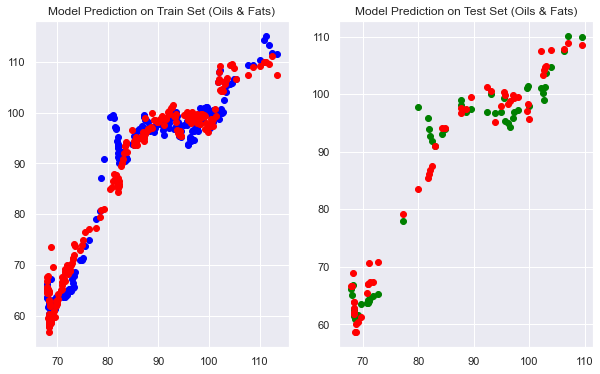

Goodness of Fit of Model 	Train Dataset (Oils & Fats)
Explained Variance (R^2) 	: 0.9494959635323897
Mean Squared Error (MSE) 	: 14.24770264372762

Prediction Accuracy of Model 	Test Dataset (Oils & Fats)
Mean Squared Error (MSE) 	: 14.689010749235482


--------------------
Predicting Fruits using 'Food' and 'Food Excl Food Serving Services'
Intercept 	: b =  [-38.96673585]
Coefficients 	: a =  [[ 2.93685034 -1.54847914]]


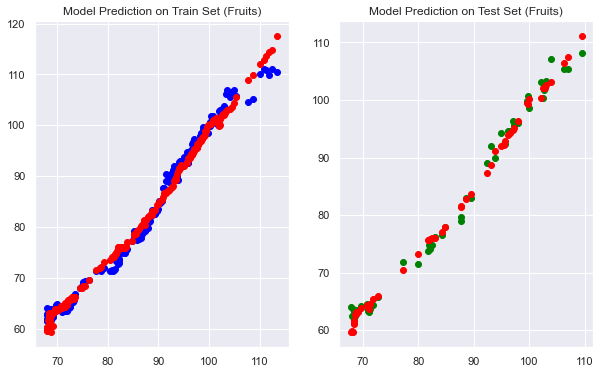

Goodness of Fit of Model 	Train Dataset (Fruits)
Explained Variance (R^2) 	: 0.9876264523453081
Mean Squared Error (MSE) 	: 2.9444599354166803

Prediction Accuracy of Model 	Test Dataset (Fruits)
Mean Squared Error (MSE) 	: 2.797417223154522


--------------------
Predicting Vegetables using 'Food' and 'Food Excl Food Serving Services'
Intercept 	: b =  [-16.29903023]
Coefficients 	: a =  [[ 1.37459438 -0.18981101]]


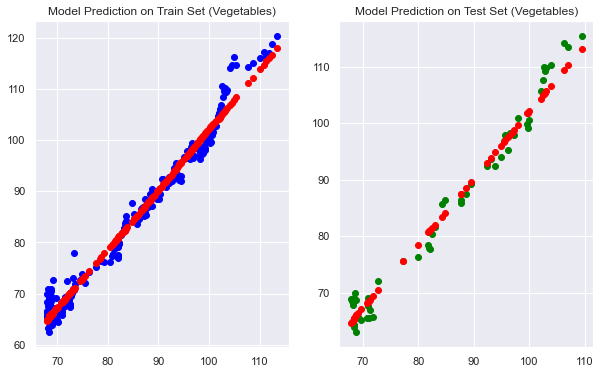

Goodness of Fit of Model 	Train Dataset (Vegetables)
Explained Variance (R^2) 	: 0.9758470225048985
Mean Squared Error (MSE) 	: 5.508953569313739

Prediction Accuracy of Model 	Test Dataset (Vegetables)
Mean Squared Error (MSE) 	: 5.910023089438218


--------------------
Predicting Sugar, Preserves & Confectionery using 'Food' and 'Food Excl Food Serving Services'
Intercept 	: b =  [44.44055386]
Coefficients 	: a =  [[-1.78750148  2.34559878]]


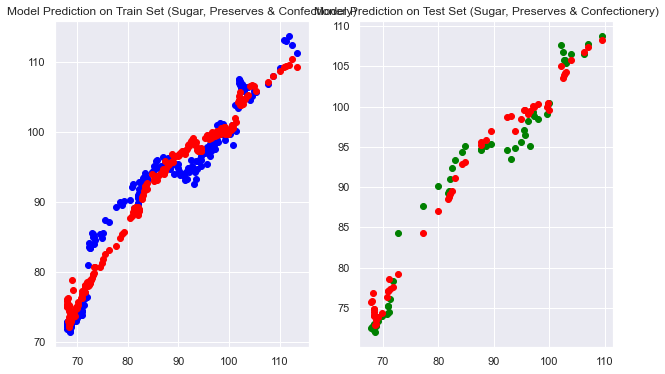

Goodness of Fit of Model 	Train Dataset (Sugar, Preserves & Confectionery)
Explained Variance (R^2) 	: 0.9531178548348737
Mean Squared Error (MSE) 	: 6.239883665738217

Prediction Accuracy of Model 	Test Dataset (Sugar, Preserves & Confectionery)
Mean Squared Error (MSE) 	: 5.093850015427691


--------------------
Predicting Non-Alcoholic Beverages using 'Food' and 'Food Excl Food Serving Services'
Intercept 	: b =  [37.84459694]
Coefficients 	: a =  [[-0.93515499  1.56195876]]


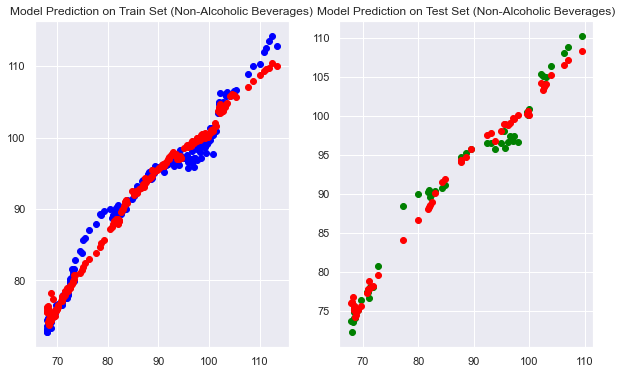

Goodness of Fit of Model 	Train Dataset (Non-Alcoholic Beverages)
Explained Variance (R^2) 	: 0.9797677317317852
Mean Squared Error (MSE) 	: 2.383957189823858

Prediction Accuracy of Model 	Test Dataset (Non-Alcoholic Beverages)
Mean Squared Error (MSE) 	: 2.6579212331014217


--------------------
Predicting Other Food using 'Food' and 'Food Excl Food Serving Services'
Intercept 	: b =  [12.72265471]
Coefficients 	: a =  [[0.08593303 0.78027526]]


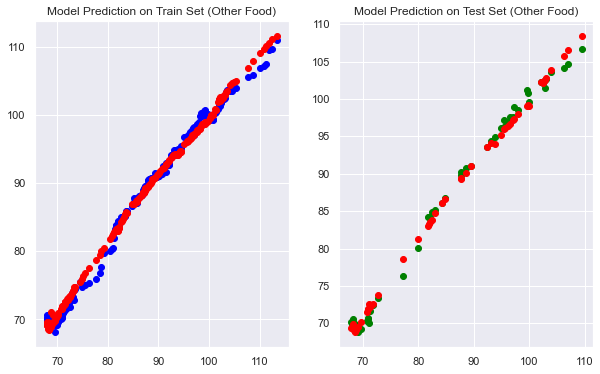

Goodness of Fit of Model 	Train Dataset (Other Food)
Explained Variance (R^2) 	: 0.994106810607041
Mean Squared Error (MSE) 	: 0.9196756937306411

Prediction Accuracy of Model 	Test Dataset (Other Food)
Mean Squared Error (MSE) 	: 0.9578012810365004



In [1188]:
multivariateLinearRegression(grocery, grocery.iloc[:,2:12])

<AxesSubplot:>

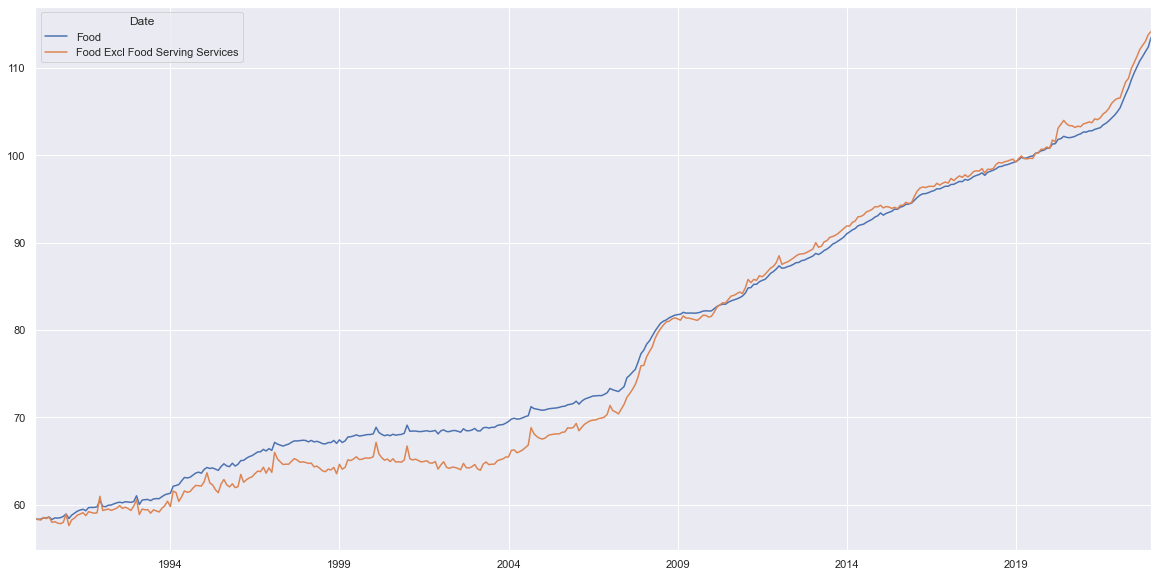

In [1189]:
grocery = grocery.iloc[:,0:2]
grocery = grocery.dropna()
grocery.tail()
grocery.plot(figsize=(20, 10))

In [1166]:
births = pd.read_csv('Datasets/Birth_Rate_clean.csv')

births = births.rename(columns = {'Data Series':'Date'})
births.set_index('Date',inplace=True)
births = births.rename(columns=lambda x: x.strip())
#births.columns = pd.to_datetime(births.columns, format='%Y %b')
births.columns = pd.DatetimeIndex(births.columns).to_period('M')

births = births.T
births = births.rename(columns=lambda x: x.strip())
births = births.sort_index()
births.head()
births.info()
#print(births.keys())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 756 entries, 1960-01 to 2022-12
Freq: M
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Total Live-Births By Ethnic Group         756 non-null    int64
 1   Malays                                    756 non-null    int64
 2   Chinese                                   756 non-null    int64
 3   Indians                                   756 non-null    int64
 4   Other Ethnic Groups                       756 non-null    int64
 5   Total Male Live-Births By Ethnic Group    756 non-null    int64
 6   Malays                                    756 non-null    int64
 7   Chinese                                   756 non-null    int64
 8   Indians                                   756 non-null    int64
 9   Other Ethnic Groups                       756 non-null    int64
 10  Total Female Live-Births By Ethnic Group  7

<AxesSubplot:>

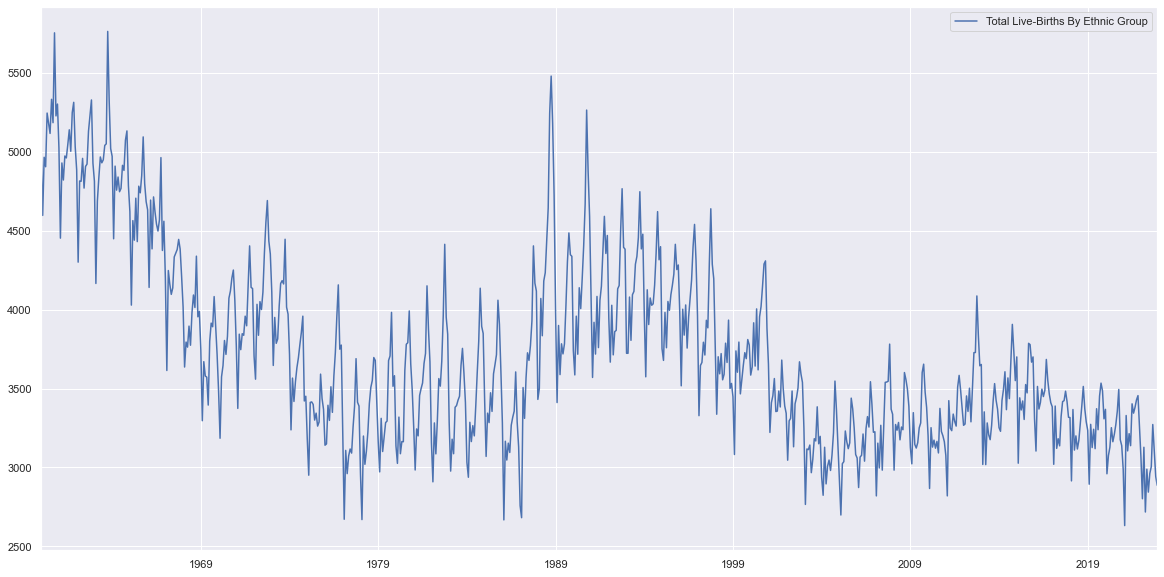

In [1167]:
#2022 Dec - 1961 Jan

#remove before 1961 jan
babies = pd.DataFrame(births['Total Live-Births By Ethnic Group'])
#babies = babies[(babies.index > "1960-12")]

babies.head()
babies = babies.astype('int64')
babies.plot(figsize=(20, 10))

<AxesSubplot:>

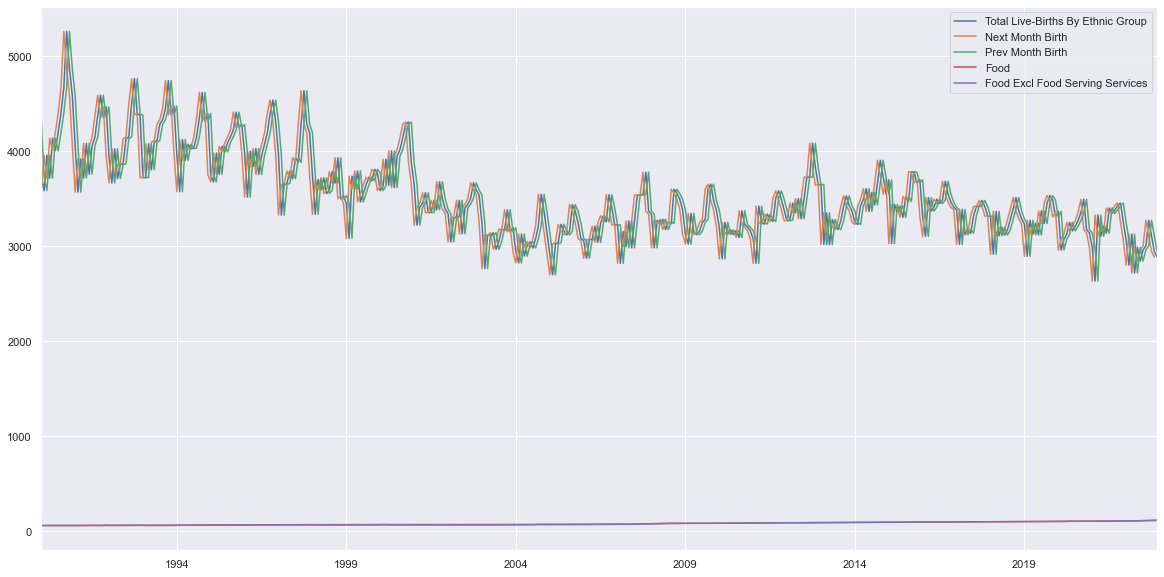

In [1170]:
grocerybirths = pd.DataFrame(births['Total Live-Births By Ethnic Group'])
grocerybirths['Next Month Birth'] = grocerybirths['Total Live-Births By Ethnic Group'].shift(-1)
grocerybirths['Prev Month Birth'] = grocerybirths['Total Live-Births By Ethnic Group'].shift(1)


groceryTotal = grocerybirths.join(grocery['Food'], how='inner')
foodexcl = grocerybirths.join(grocery['Food Excl Food Serving Services'], how='inner')
# bread = grocerybirths.join(grocery['Bread & Cereals'], how='inner')
# meat = grocerybirths.join(grocery['Meat'], how='inner')
# fish = grocerybirths.join(grocery['Fish & Seafood'], how='inner')
# eggs = grocerybirths.join(grocery['Milk, Cheese & Eggs'], how='inner')
# oil = grocerybirths.join(grocery['Oils & Fats'], how='inner')
# fruit = grocerybirths.join(grocery['Fruits'], how='inner')
# vegetable = grocerybirths.join(grocery['Vegetables'], how='inner')
# sugar = grocerybirths.join(grocery['Sugar, Preserves & Confectionery'], how='inner')
# alcohol = grocerybirths.join(grocery['Non-Alcoholic Beverages'], how='inner')
# others = grocerybirths.join(grocery['Other Food'], how='inner')

groceryMerge = pd.concat([groceryTotal, foodexcl], axis=1, join='inner')
groceryMerge = groceryMerge.loc[:,~groceryMerge.columns.duplicated(keep='first')]

groceryMerge.plot(figsize=(20, 10))

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 396 entries, 1990-01 to 2022-12
Freq: M
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total Live-Births By Ethnic Group  396 non-null    int64  
 1   Next Month Birth                   395 non-null    float64
 2   Prev Month Birth                   396 non-null    float64
 3   Food                               396 non-null    float64
 4   Food Excl Food Serving Services    396 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 34.7 KB


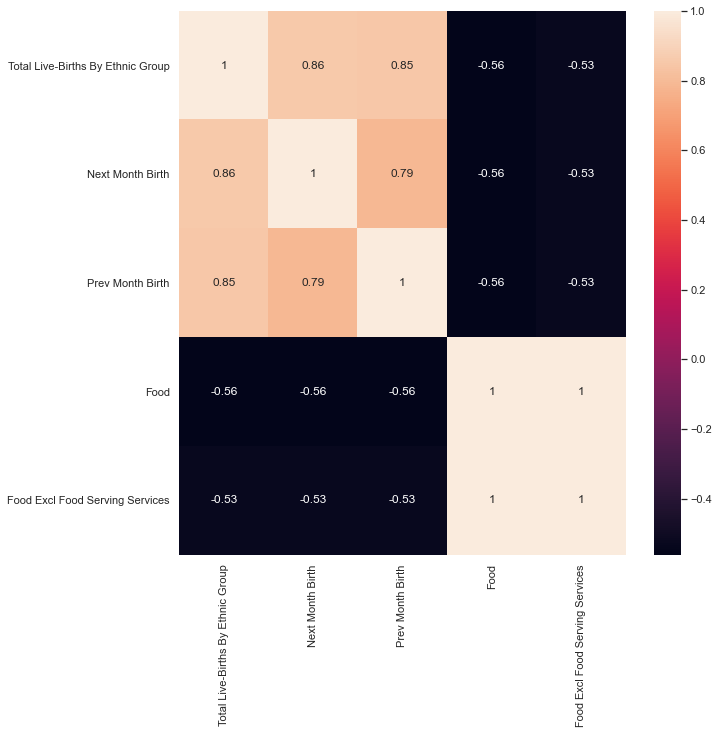

In [1171]:
groceryMerge.info()
groceryMerge.corr()

corr_matrix = groceryMerge.corr()
plt.figure(figsize=(10,10))
sb.heatmap(corr_matrix, annot=True)
plt.show()

# Random Forest

In [1180]:
resultsRf = []

for i in range(250):
    seed = random.randint(0, 10000)
    num_folds = 5
    
    # Step 1: Create binary target variable
    groceryMerge['Prediction'] = (groceryMerge['Total Live-Births By Ethnic Group'] > groceryMerge['Next Month Birth']).astype(int)

    # Step 2: Combine features into single dataframe
    # Step 2.1: Predictors with the highest correlation
    x = groceryMerge[['Total Live-Births By Ethnic Group', 'Prev Month Birth','Food','Food Excl Food Serving Services']]

    # Step 2.2: Response
    y = groceryMerge['Prediction']
    
    # Step 3: Split data into training and test sets
    kResRf = []
    kf = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

    # Step 4: Create Random Forest Classifier object
    for fold, (train_idx, test_idx) in enumerate(kf.split(x)):
        # Step 4.1: Split data into training and test sets
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Step 4.2: Creating Random Forest and Logistic Regression Classifier
        rf = RandomForestClassifier(max_depth=10)
        
        # Step 4.3: Fit model to training data
        rf.fit(x_train, y_train)
        
        # Step 4.4: Make predictions on test data
        y_pred_rf = rf.predict(x_test)
        
        # Step 4.5: Evalute performance
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        precision_rf = precision_score(y_test, y_pred_rf)
        recall_rf = recall_score(y_test, y_pred_rf)
        f1_rf = f1_score(y_test, y_pred_rf)
        
        kResRf.append((fold, accuracy_rf, precision_rf, recall_rf, f1_rf))

    # Step 5: Fit model to training data
    rf.fit(x_train, y_train)

    # Step 6: Make predictions on test data
    acc_mean_rf, acc_std_rf = np.mean([r[1] for r in kResRf]), np.std([r[1] for r in kResRf])
    prec_mean_rf, prec_std_rf = np.mean([r[2] for r in kResRf]), np.std([r[2] for r in kResRf])
    rec_mean_rf, rec_std_rf = np.mean([r[3] for r in kResRf]), np.std([r[3] for r in kResRf])
    f1_mean_rf, f1_std_rf = np.mean([r[4] for r in kResRf]), np.std([r[4] for r in kResRf])
    
    resultsRf.append((seed, acc_mean_rf, acc_std_rf, prec_mean_rf, prec_std_rf, rec_mean_rf, rec_std_rf, f1_mean_rf, f1_std_rf))
    
resultsRf.sort(key=lambda x: x[7], reverse=True)

In [1181]:
resultsLr = []

for i in range(5):
    seed = resultsRf[i][0]
    kResLr = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(x)):
        X_train, X_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        lr = LogisticRegression(max_iter=1000, solver='liblinear')
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        
        accuracy_lr = accuracy_score(y_test, y_pred_lr)
        precision_lr = precision_score(y_test, y_pred_lr)
        recall_lr = recall_score(y_test, y_pred_lr)
        f1_lr = f1_score(y_test, y_pred_lr)
        kResLr.append((fold, accuracy_lr, precision_lr, recall_lr, f1_lr))
        
    acc_mean_lr, acc_std_lr = np.mean([r[1] for r in kResLr]), np.std([r[1] for r in kResLr])
    prec_mean_lr, prec_std_lr = np.mean([r[2] for r in kResLr]), np.std([r[2] for r in kResLr])
    rec_mean_lr, rec_std_lr = np.mean([r[3] for r in kResLr]), np.std([r[3] for r in kResLr])
    f1_mean_lr, f1_std_lr = np.mean([r[4] for r in kResLr]), np.std([r[4] for r in kResLr])   
    resultsLr.append((seed, acc_mean_lr, acc_std_lr, prec_mean_lr, prec_std_lr, rec_mean_lr, rec_std_lr, f1_mean_lr, f1_std_lr))

In [1182]:
topResultsRf = resultsRf[:5]

for i in range(5):
    print('----------------------------------------------')
    print(f"Random state {topResultsRf[i][0]}:")
    print(f'Accuracy  = {topResultsRf[i][1]:.4f} +/- {topResultsRf[i][2]:.4f}  vs  {resultsLr[i][1]:.4f} +/- {resultsLr[i][2]:.4f}')
    print(f'Precision = {topResultsRf[i][3]:.4f} +/- {topResultsRf[i][4]:.4f}  vs  {resultsLr[i][3]:.4f} +/- {resultsLr[i][4]:.4f}')
    print(f'Recall    = {topResultsRf[i][5]:.4f} +/- {topResultsRf[i][6]:.4f}  vs  {resultsLr[i][5]:.4f} +/- {resultsLr[i][6]:.4f}')
    print(f'F1 score  = {topResultsRf[i][7]:.4f} +/- {topResultsRf[i][8]:.4f}  vs  {resultsLr[i][7]:.4f} +/- {resultsLr[i][8]:.4f}')
print('----------------------------------------------')

----------------------------------------------
Random state 6070:
Accuracy  = 0.7223 +/- 0.0233  vs  0.5885 +/- 0.0312
Precision = 0.7088 +/- 0.0264  vs  0.5919 +/- 0.0769
Recall    = 0.7253 +/- 0.0672  vs  0.5407 +/- 0.0641
F1 score  = 0.7144 +/- 0.0226  vs  0.5574 +/- 0.0224
----------------------------------------------
Random state 7170:
Accuracy  = 0.7021 +/- 0.0204  vs  0.5885 +/- 0.0312
Precision = 0.6700 +/- 0.0473  vs  0.5919 +/- 0.0769
Recall    = 0.7602 +/- 0.0331  vs  0.5407 +/- 0.0641
F1 score  = 0.7103 +/- 0.0195  vs  0.5574 +/- 0.0224
----------------------------------------------
Random state 9797:
Accuracy  = 0.7121 +/- 0.0375  vs  0.5885 +/- 0.0312
Precision = 0.6982 +/- 0.0653  vs  0.5919 +/- 0.0769
Recall    = 0.7224 +/- 0.0625  vs  0.5407 +/- 0.0641
F1 score  = 0.7059 +/- 0.0326  vs  0.5574 +/- 0.0224
----------------------------------------------
Random state 3385:
Accuracy  = 0.7072 +/- 0.0260  vs  0.5885 +/- 0.0312
Precision = 0.6742 +/- 0.0983  vs  0.5919 +/- 0

In [1183]:
print(f'Average Accuracy:  {sum([i[1] for i in topResultsRf])/5:.4f}  vs  {sum([i[1] for i in resultsLr])/5:.4f}')
print(f'Average Precision: {sum([i[3] for i in topResultsRf])/5:.4f}  vs  {sum([i[3] for i in resultsLr])/5:.4f}')
print(f'Average Recall:    {sum([i[5] for i in topResultsRf])/5:.4f}  vs  {sum([i[5] for i in resultsLr])/5:.4f}')
print(f'Average F1 Score:  {sum([i[7] for i in topResultsRf])/5:.4f}  vs  {sum([i[7] for i in resultsLr])/5:.4f}')

Average Accuracy:  0.7101  vs  0.5885
Average Precision: 0.6875  vs  0.5919
Average Recall:    0.7375  vs  0.5407
Average F1 Score:  0.7079  vs  0.5574
